In [ ]:
import torch
from torch import nn
import random
import matplotlib.pyplot as plt
import time
import pylab as pl
from IPython import display
import math
from math import floor,ceil

In [ ]:
def f(a):
    return torch.tensor(float(a))

In [ ]:
#@title draw board

from IPython.display import display, HTML,clear_output

def visualize_board(board):
    """
    Visualize a board as an HTML table in Colab.
    """
    html = "<table>"
    for row in board:
        html += "<tr>"
        for cell in row:
            if cell == 0: #  wall
                html += "<td style='background-color: black; width: 30px; height: 30px;'></td>"
            elif cell == 3: # empty
                html += "<td style='background-color: white; width: 30px; height: 30px;'></td>"
            elif cell == 1: # pacman
                html += "<td style='background-color: blue; width: 30px; height: 30px;'></td>"
            elif cell == 2: # bot
                html += "<td style='background-color: red; width: 30px; height: 30px;'></td>"
            elif cell == 5: # coin
                html += "<td style='background-color: yellow; width: 30px; height: 30px;'></td>"
        html += "</tr>"
    html += "</table>"
    #clear_output()
    #display(HTML(html))
    #time.sleep(0.041)

In [ ]:
#@title board define
board = [
          [5,3,3,3,3,0,0,0,0,0,3,3,3,3,5],
          [3,0,0,0,3,0,3,3,3,0,3,0,0,0,3],
          [3,0,0,0,3,5,3,0,3,5,3,0,0,0,3],
          [3,0,0,0,3,0,0,0,0,0,3,0,0,0,3],
          [3,3,3,3,3,3,3,3,3,3,3,3,3,3,3],
          [0,5,0,0,0,0,0,5,0,0,0,0,0,5,0],
          [0,3,3,3,0,3,3,3,3,3,0,3,3,3,0],
          [0,0,0,3,5,3,0,0,0,3,5,3,0,0,0],
          [0,3,3,3,0,3,3,3,3,3,0,3,3,3,0],
          [0,5,0,0,0,0,0,5,0,0,0,0,0,5,0],
          [3,3,3,3,3,3,3,3,3,3,3,3,3,3,3],
          [3,0,0,0,3,0,0,0,0,0,3,0,0,0,3],
          [3,0,0,0,3,5,3,0,3,5,3,0,0,0,3],
          [3,0,0,0,3,0,3,3,3,0,3,0,0,0,3],
          [5,3,3,3,3,0,0,0,0,0,3,3,3,3,5],
          ]
visualize_board(board)

In [ ]:
def isValidPos_y(y):
    if 0 <= y <= 14:
        return True
    else:
        return False

In [ ]:
def isValidPos_x(x):
    if 0 <= x <= 14 :
        return True
    else:
        return False

In [ ]:
pacman_x_start=7
pacman_y_start=13

bot_x_start=7
bot_y_start=1

In [ ]:
model = nn.Sequential(nn.Linear(2,6),nn.Linear(6,3))

In [ ]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr=0.005,momentum=0.9)

In [ ]:
lossList=[]
num_iter=[]
output_list_x=[]
output_list_y=[]
desiredOutput_list_x=[]
desiredOutput_list_y=[]

last_pac_x = pacman_x_start
last_pac_y = pacman_y_start

last_bot_x = bot_x_start
last_bot_y = bot_y_start
num_coin=0
r=[-1,0,1]
desiredOutput_coin = f(0)
for i in range(2000):

    desiredOutput_x = f(last_pac_x)
    desiredOutput_y = f(last_pac_y)

    board[last_pac_y][last_pac_x]=1
    if board[last_bot_y][last_bot_x]!=5:
        board[last_bot_y][last_bot_x]=2

    visualize_board(board)
    if (abs(last_bot_x - last_pac_x)<=1 and last_bot_y==last_pac_y)or (abs(last_bot_y - last_pac_y)<=1 and last_bot_x==last_pac_x):
        break
    #################### output of model

    output_model_x, output_model_y, output_model_coin = model(torch.tensor([float(0.003*last_bot_x),float(0.003*last_bot_y)]))  # coef


    board[last_bot_y][last_bot_x]=3
    board[last_pac_y][last_pac_x]=3


    ###-----------------------------------new values
    delta_x_pac=random.choice(r)
    delta_y_pac=random.choice(r)
    '''user_input = input()
    if user_input == 'w':
        delta_y_pac = -1
        delta_x_pac = 0
    elif user_input == 's':
        delta_y_pac = 1
        delta_x_pac = 0
    elif user_input == 'd':
        delta_y_pac = 0
        delta_x_pac = 1
    elif user_input == 'a':
        delta_y_pac = 0
        delta_x_pac = -1'''
    ##------------------------------------
    if isValidPos_x(last_pac_x + delta_x_pac) and board[last_pac_y][last_pac_x + delta_x_pac] != 0:
        if board[last_pac_y][last_pac_x + delta_x_pac] == 5:
            board[last_pac_y][last_pac_x + delta_x_pac] = 3
            num_coin = num_coin + 1
        last_pac_x = last_pac_x + delta_x_pac
    if isValidPos_y(last_pac_y + delta_y_pac) and board[last_pac_y + delta_y_pac][last_pac_x] != 0:
        if board[last_pac_y + delta_y_pac][last_pac_x] == 5:
            board[last_pac_y + delta_y_pac][last_pac_x] = 3
            num_coin = num_coin + 1
        last_pac_y = last_pac_y + delta_y_pac
    '''
    delta_x_bot=0
    delta_y_bot=0
    if (floor(output_model_x.item())-last_pac_x)>0:
        delta_x_bot = delta_x_bot+1
    elif (floor(output_model_x.item())-last_pac_x)<0:
        delta_x_bot = delta_x_bot-1
    if (floor(output_model_y.item())-last_pac_y)>0:
        delta_y_bot = delta_y_bot+1
    elif (floor(output_model_y.item())-last_pac_y)<0:
        delta_y_bot = delta_y_bot-1
    '''
    delta_x_bot =1*( (floor(output_model_x.item())-last_pac_x) % 3 - 1 )                                  # coef
    delta_y_bot =1*( (floor(output_model_y.item())-last_pac_y) % 3 - 1 )

    if isValidPos_x(last_bot_x + delta_x_bot) and board[last_bot_y][last_bot_x + delta_x_bot] != 0:
        last_bot_x = last_bot_x + delta_x_bot
    if isValidPos_y(last_bot_y + delta_y_bot) and board[last_bot_y + delta_y_bot][last_bot_x] != 0:
        last_bot_y = last_bot_y + delta_y_bot
    ###------------------------------------ loss
    loss_x = criterion(output_model_x.squeeze(), desiredOutput_x)
    loss_y = criterion(output_model_y.squeeze(), desiredOutput_y)
    loss_coin = criterion(output_model_coin.squeeze() , desiredOutput_coin)
    loss = loss_x + loss_y + loss_coin

    #################### make list for plot
    num_iter.append(i)
    desiredOutput_list_x.append(desiredOutput_x)
    output_list_x.append(output_model_x.item())
    desiredOutput_list_y.append(desiredOutput_y)
    output_list_y.append(output_model_y.item())

    lossList.append(loss.item())

    #################### plot
    #plt.plot (num_iter,desiredOutput_list_y,'-',color='black')
    #plt.plot (num_iter,output_list_y, '--', color='red')
    #plt.plot (num_iter,lossList, '-', color='blue')

    #display.clear_output(wait=True)
    #display.display(pl.gcf())
    #time.sleep(0.001)

    #################### update neural network weights
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

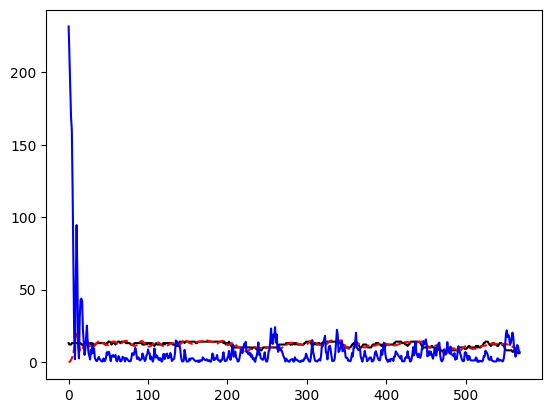

In [ ]:
plt.plot (num_iter,desiredOutput_list_y,'-',color='black')
plt.plot (num_iter,output_list_y, '--', color='red')
plt.plot (num_iter,lossList, '-', color='blue')

In [ ]:
num_coin

7

In [ ]:
loss_coin.item()

0.00011052667832700536

In [ ]:
#torch.save(model.state_dict(), 'checkpoint.txt')
from google.colab import files
# download checkpoint file
#files.download('checkpoint.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
print("Our model: \n\n", model, '\n')
print("The state dict keys: \n\n", model.state_dict().keys())

Our model: 

 Sequential(
  (0): Linear(in_features=2, out_features=6, bias=True)
  (1): Linear(in_features=6, out_features=3, bias=True)
) 

The state dict keys: 

 odict_keys(['0.weight', '0.bias', '1.weight', '1.bias'])


In [ ]:
model.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.4177, -0.5679],
                      [-0.3789,  0.0212],
                      [ 0.1010,  0.0474],
                      [-0.5869, -0.2050],
                      [-0.0567,  0.3834],
                      [ 0.4256,  0.3153]])),
             ('0.bias',
              tensor([ 0.1998, -0.1400, -0.2474,  0.0030, -0.3058,  0.0852])),
             ('1.weight',
              tensor([[ 0.5262, -0.0176,  0.8799, -0.8004,  0.5108, -0.4577],
                      [ 0.4707,  0.1005,  1.0040, -0.8364,  0.6767, -0.4780],
                      [ 0.3757,  0.2880,  0.2261,  0.3743,  0.0776,  0.2808]])),
             ('1.bias', tensor([2.2675e+00, 8.4677e+00, 8.1965e-03]))])